In [1]:
!pip install transformers

Why bart-large-mnli: (407M params)

*   classify data into categories it hasn't explicitly been trained on

*   is a transformer-based model designed for a variety of NLP tasks.




Device set to use cuda:0


Classified data saved to classified_questions.json


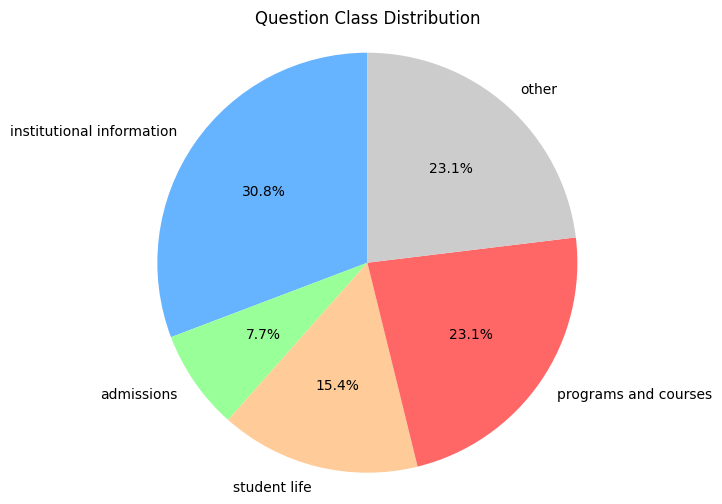

In [3]:
from transformers import pipeline
import json
import matplotlib.pyplot as plt

# Load pre-trained model for zero-shot classification
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define possible categories
candidate_labels = [
    "schedule",
    "registration",
    "course content",
    "technical support",
    "institutional information",
    "programs and courses",
    "student life",
    "admissions",
    "technology and facilities",
    "other"
]

# Sample questions (add more questions as needed)
questions = [
    "What is the mission of our institution?",
    "What are the core values of our school?",
    "How many students are enrolled this year?",
    "What is the average duration for obtaining a degree?",
    "What are the academic partnerships of the institution?",
    "What undergraduate programs are offered?",
    "What graduate programs are available?",
    "Are there online or distance learning programs?",
    "What are the most popular courses among students?",
    "Are there international exchange programs?",
    "What is the institution's policy on plagiarism?",
    "How does the grading system work?",
    "What are the rules regarding absences in class?"

]

# Function to classify each question and save to JSON
def classify_and_save(questions, candidate_labels, json_file='classified_questions.json'):
    classified_data = []

    for question in questions:
        # Classify the question
        result = classifier(question, candidate_labels)

        # Find the class with the highest probability
        max_score_idx = result['scores'].index(max(result['scores']))
        max_label = result['labels'][max_score_idx]

        # Append the question and its predicted class to the list
        classified_data.append({
            'question': question,
            'predicted_class': max_label
        })

    # Save the classified data to a JSON file
    with open(json_file, 'w') as f:
        json.dump(classified_data, f, indent=4)
    print(f"Classified data saved to {json_file}")
    return classified_data

# Function to generate a pie chart of class distribution
def generate_class_distribution_graph(classified_data):
    # Count the occurrences of each class
    class_counts = {}
    for entry in classified_data:
        class_label = entry['predicted_class']
        if class_label in class_counts:
            class_counts[class_label] += 1
        else:
            class_counts[class_label] = 1

    # Prepare data for the pie chart
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    total = sum(counts)
    percentages = [(count / total) * 100 for count in counts]

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(percentages, labels=classes, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666','#cccccc'])
    plt.title('Question Class Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()

# Main function
def main():
    classified_data = classify_and_save(questions, candidate_labels)
    generate_class_distribution_graph(classified_data)

if __name__ == "__main__":
    main()


In [3]:
# Classifier une seule question
question = "What is the mission of our institution?"
result = classifier(question, candidate_labels)

# Afficher la classe prédite
max_score_idx = result['scores'].index(max(result['scores']))
max_label = result['labels'][max_score_idx]

print(f"Question: {question}")
print(f"Predicted Class: {max_label}")


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Question: What is the mission of our institution?
Predicted Class: institutional information


Device set to use cuda:0


Classified data saved to classified_questions.json


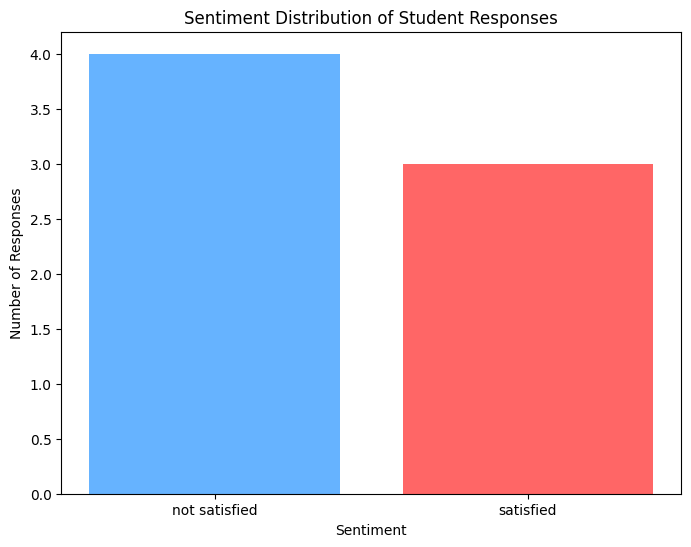

In [4]:
from transformers import pipeline
import json
import matplotlib.pyplot as plt

# Load pre-trained model for zero-shot classification
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define possible categories
candidate_labels = [
    "satisfied",
    "not satisfied"
]

# Sample questions (add more questions as needed)
questions = [
    "Non, je ne trouve toujours pas ce que je cherchais.",
    "Très utile, je suis content d'avoir trouvé la réponse rapidement.",
    "La réponse était trop vague, ce n'est pas ce que je voulais savoir.",
    "Très satisfait, la réponse est très détaillée.",
    "Oui, c'était parfait, je n'avais pas de questions supplémentaires.",
    "Non, ce n'est pas assez détaillé, je n'ai pas tout compris.",
    "La réponse n'a pas résolu mon problème, je suis déçu."
]

# Function to classify each question and save to JSON
def classify_and_save(questions, candidate_labels, json_file='classified_questions.json'):
    classified_data = []

    for question in questions:
        # Classify the question
        result = classifier(question, candidate_labels)

        # Find the class with the highest probability
        max_score_idx = result['scores'].index(max(result['scores']))
        max_label = result['labels'][max_score_idx]

        # Append the question and its predicted class to the list
        classified_data.append({
            'question': question,
            'predicted_class': max_label
        })

    # Save the classified data to a JSON file
    with open(json_file, 'w') as f:
        json.dump(classified_data, f, indent=4)
    print(f"Classified data saved to {json_file}")
    return classified_data

# Function to generate a bar chart of class distribution
def generate_class_distribution_graph(classified_data):
    # Count the occurrences of each class
    class_counts = {}
    for entry in classified_data:
        class_label = entry['predicted_class']
        if class_label in class_counts:
            class_counts[class_label] += 1
        else:
            class_counts[class_label] = 1

    # Prepare data for the bar chart
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    # Create a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(classes, counts, color=['#66b3ff','#ff6666'])
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Responses')
    plt.title('Sentiment Distribution of Student Responses')
    plt.show()

# Main function
def main():
    classified_data = classify_and_save(questions, candidate_labels)
    generate_class_distribution_graph(classified_data)

if __name__ == "__main__":
    main()
